#Author : Gaurav Khandave
#Version : 1.0
#Date : 09/10/2016

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("train.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.shape

(891, 12)

# EDA for the fields:  'PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', and 'Embarked'

## Field : PassengerId

In [5]:
data[data.PassengerId.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [6]:
data.PassengerId.describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

In [7]:
data.PassengerId.value_counts()

891    1
293    1
304    1
303    1
302    1
301    1
300    1
299    1
298    1
297    1
296    1
295    1
294    1
292    1
306    1
291    1
290    1
289    1
288    1
287    1
286    1
285    1
284    1
283    1
282    1
281    1
305    1
307    1
279    1
321    1
      ..
561    1
560    1
584    1
585    1
586    1
587    1
610    1
609    1
608    1
607    1
606    1
605    1
604    1
603    1
602    1
601    1
600    1
599    1
598    1
597    1
596    1
595    1
594    1
593    1
592    1
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, dtype: int64

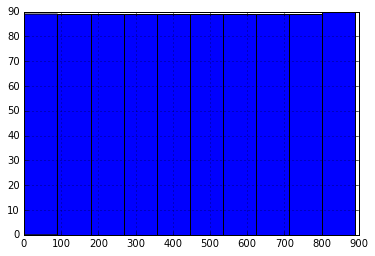

In [8]:
data.PassengerId.hist()

### The field is continuous and there are no missing values.

## Field : Pclass

In [9]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
data[data.Pclass.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
#Which class has more number of survived people

data[data.Pclass == 3].Survived.value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [12]:
#What is the percentage of survival of class 3?

cls3Survived = data[data.Pclass == 3].Survived.value_counts()[1] + 0.0
totalCls3 = data.Pclass.value_counts()[3] + 0.0

cls3Survived/totalCls3*100

24.236252545824847

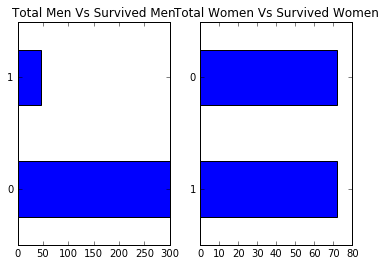

In [13]:
#How many men and women of class 3 survived?
fig,axs = plt.subplots(1,2)
data[(data.Pclass == 3) & (data.Sex == 'male')].Survived.value_counts().plot(kind="barh",title="Total Men Vs Survived Men",ax=axs[0])
data[(data.Pclass == 3) & (data.Sex == 'female')].Survived.value_counts().plot(kind="barh",title="Total Women Vs Survived Women",ax=axs[1])

In [14]:
data[data.Pclass == 2].Survived.value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [15]:
#What is the percentage of survival of class 2?

cls2Survived = data[data.Pclass == 2].Survived.value_counts()[1] + 0.0
totalCls2 = data.Pclass.value_counts()[2] + 0.0

cls2Survived/totalCls2*100

47.282608695652172

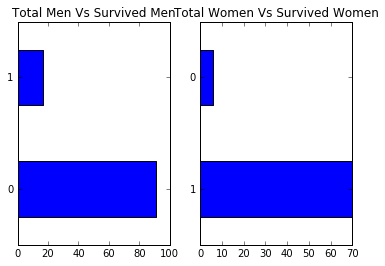

In [16]:
#How many men and women of class 2 survived?
fig,axs = plt.subplots(1,2)
data[(data.Pclass == 2) & (data.Sex == 'male')].Survived.value_counts().plot(kind="barh",title="Total Men Vs Survived Men",ax=axs[0])
data[(data.Pclass == 2) & (data.Sex == 'female')].Survived.value_counts().plot(kind="barh",title="Total Women Vs Survived Women",ax=axs[1])

In [17]:
data[data.Pclass == 1].Survived.value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [18]:
#What is the percentage of survival of class 1?

cls1Survived = data[data.Pclass == 1].Survived.value_counts()[1] + 0.0
totalCls1 = data.Pclass.value_counts()[1] + 0.0

cls1Survived/totalCls1*100

62.962962962962962

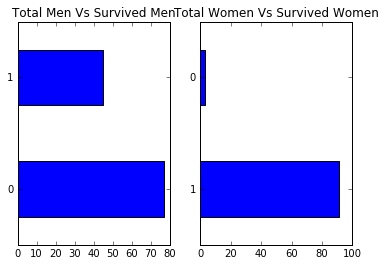

In [19]:
#How many men and women of class 1 survived?
fig,axs = plt.subplots(1,2)
data[(data.Pclass == 1) & (data.Sex == 'male')].Survived.value_counts().plot(kind="barh",title="Total Men Vs Survived Men",ax=axs[0])
data[(data.Pclass == 1) & (data.Sex == 'female')].Survived.value_counts().plot(kind="barh",title="Total Women Vs Survived Women",ax=axs[1])

In [20]:
data[data.Pclass == 1].Fare.describe()

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64

In [21]:
data[data.Pclass == 2].Fare.describe()

count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64

In [22]:
data[data.Pclass == 3].Fare.describe()

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64

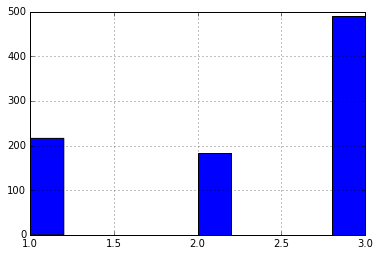

In [23]:
#Histogram

data.Pclass.hist()

### The field is categorical and there are no missing values.

## Field : Survived

In [24]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
data[data.Survived.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [26]:
data[data.Fare == 0].Survived.value_counts()

0    14
1     1
Name: Survived, dtype: int64

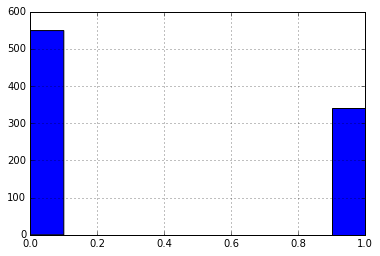

In [27]:
data.Survived.hist()

### The field is categorical with no missing values.

## Field : Sex

In [28]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
data[data.Sex.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [30]:
data[data.Age < 15].Sex.value_counts()

female    39
male      39
Name: Sex, dtype: int64

In [31]:
data[data.Survived == 1].Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [32]:
data[(data.Sex == "female") & (data.Pclass == 2)].Cabin.value_counts()

F33     3
E101    3
D       2
E77     1
F4      1
Name: Cabin, dtype: int64

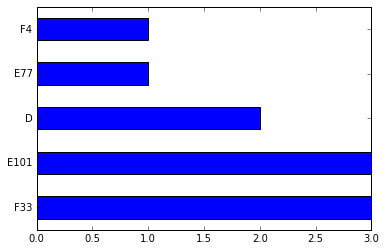

In [33]:
data[(data.Sex == "female") & (data.Pclass == 2)].Cabin.value_counts().plot(kind="barh")

### The field is categorical and no missing values.

## Field : Age

In [34]:
data[data.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


# There are missing values. We will try to predict missing values.

<li> Replace null with 0
<li> Take average of ages of passengers.

In [35]:
avgAge = data.Age.mean()
avgAge

29.69911764705882

In [36]:
# We will replace null values with average age
data.Age = data.Age.fillna(value=avgAge)

In [37]:
data[data.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [38]:
data[(data.Age < 15) & (data.Survived == 1)].Sex.value_counts()

female    24
male      21
Name: Sex, dtype: int64

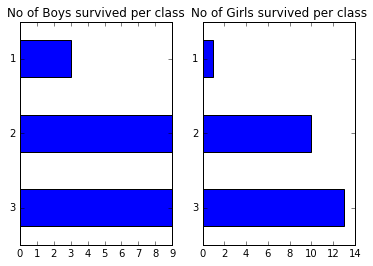

In [39]:
fig,axs = plt.subplots(1,2)
data[(data.Age < 15) & (data.Sex == 'male') & (data.Survived == 1)].Pclass.value_counts().plot(kind='barh',ax=axs[0],title="No of Boys survived per class")
data[(data.Age < 15) & (data.Sex == 'female') & (data.Survived == 1)].Pclass.value_counts().plot(kind='barh',ax=axs[1],title="No of Girls survived per class")

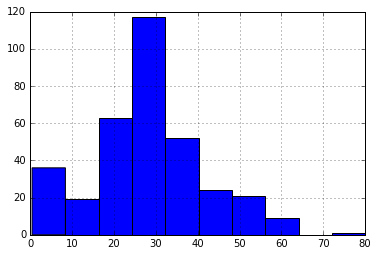

In [40]:
data[data.Survived == 1].Age.hist()

### The data is continous and the missing values are now handled.

## Field : SibSp

In [41]:
data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [42]:
data[data.SibSp.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


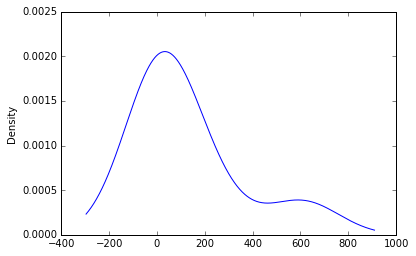

In [43]:
data.SibSp.value_counts().plot(kind="kde")

### The field is categorical with no missing values.

## Field : Parch

In [44]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [45]:
data[data.Parch.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


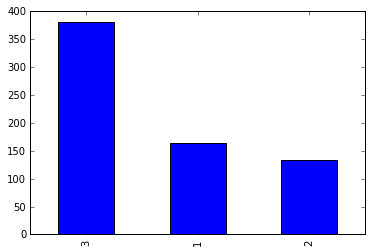

In [46]:
data[data.Parch == 0].Pclass.value_counts().plot(kind="bar")

### The field is categorical with no missing values.

# Field : Ticket

In [47]:
data.Ticket.value_counts()

CA. 2343             7
347082               7
1601                 7
347088               6
CA 2144              6
3101295              6
382652               5
S.O.C. 14879         5
PC 17757             4
4133                 4
LINE                 4
349909               4
347077               4
W./C. 6608           4
113760               4
2666                 4
113781               4
19950                4
17421                4
347742               3
239853               3
110152               3
24160                3
13502                3
PC 17572             3
C.A. 34651           3
248727               3
35273                3
F.C.C. 13529         3
PC 17755             3
                    ..
330877               1
315094               1
236852               1
4137                 1
4136                 1
226593               1
4134                 1
374746               1
110813               1
C.A. 6212            1
349219               1
34218                1
343120     

In [48]:
data[data.Ticket.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [49]:
data.Ticket.describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

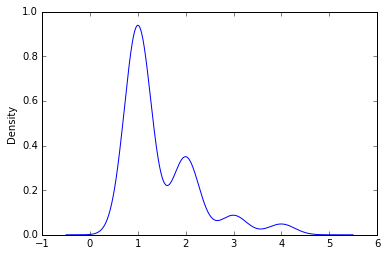

In [50]:
data[data.Pclass == 1].Ticket.value_counts().plot(kind='kde')

### The field is categorical with no missing values

## Field : Fare

In [51]:
data.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
7.2292      15
26.5500     15
0.0000      15
8.6625      13
7.8542      13
7.2500      13
7.2250      12
9.5000       9
16.1000      9
15.5000      8
24.1500      8
14.5000      7
7.0500       7
56.4958      7
52.0000      7
69.5500      7
31.2750      7
14.4542      7
27.9000      6
7.7958       6
30.0000      6
26.2500      6
            ..
6.9500       1
15.0500      1
21.6792      1
7.1417       1
15.0458      1
4.0125       1
12.0000      1
8.4583       1
7.7875       1
14.0000      1
15.0000      1
9.8417       1
12.2750      1
12.2875      1
22.5250      1
6.4500       1
15.5500      1
8.5167       1
63.3583      1
6.8583       1
22.0250      1
13.7917      1
221.7792     1
12.6500      1
8.8500       1
61.1750      1
10.1708      1
76.2917      1
15.1000      1
81.8583      1
Name: Fare, dtype: int64

In [52]:
data[data.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [53]:
data[data.Fare == 0].Survived.value_counts()

0    14
1     1
Name: Survived, dtype: int64

In [54]:
data[data.Fare == data.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [55]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

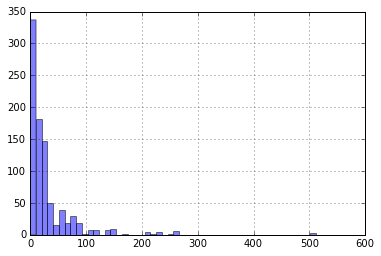

In [56]:
data.Fare.hist(alpha=0.5,bins=50)

### This field is continuous with range and no empty values.

## Field : Cabin

In [57]:
data.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

In [58]:
data[data.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000000,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000000,0,0,350406,7.8542,NaN,S


## How to handle null values for column Cabin?

#Strategy
<li> Analyze the Cabins according to class.

In [59]:
data.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [60]:
# For class 3
arr = data[data.Pclass == 3].Cabin.tolist()
i = 0 
for value in arr:
    if type(value) == str:
        print arr[i]
    i=i+1

G6
F G73
F E69
G6
G6
G6
E10
F G63
F G73
E121
F38
E121


In [61]:
# For class 2
arr = data[data.Pclass == 2].Cabin.tolist()
i = 0 
for value in arr:
    if type(value) == str:
        print arr[i]
    i=i+1

D56
F33
E101
F2
F4
F2
D
E101
D
F2
F33
D
F33
F4
E101
E77


In [62]:
# For class 1
arr = data[data.Pclass == 1].Cabin.tolist()
i = 0 
for value in arr:
    if type(value) == str:
        print arr[i]
    i=i+1

C85
C123
E46
C103
A6
C23 C25 C27
B78
D33
B30
C52
B28
C83
C23 C25 C27
E31
A5
D10 D12
D26
C110
B58 B60
D26
D47
C123
B86
C2
E33
B19
A7
C49
A32
B4
B80
A31
D36
D15
C93
C83
C78
D35
C87
B77
E67
B94
C125
C99
C118
D7
A19
B49
C22 C26
C106
B58 B60
C22 C26
C65
E36
C54
B57 B59 B63 B66
C7
E34
C32
B18
C124
C91
C2
E40
T
C23 C25 C27
C128
E33
D37
B35
E50
C82
B96 B98
D36
C78
C52
E44
B96 B98
C23 C25 C27
A34
C104
C111
C92
E38
D21
E12
E63
A14
B49
C93
B37
C30
D20
C22 C26
B79
C65
E25
D46
B73
B18
C95
B38
B39
B22
C86
C70
A16
E67
C101
E25
E44
C68
A10
E68
B41
D20
A20
C125
D19
D50
D9
A23
B50
B35
D33
A26
D48
E58
C126
B71
B51 B53 B55
D49
B5
B20
C68
C62 C64
E24
E24
C90
C124
C126
C45
E8
B5
B101
D45
C46
B57 B59 B63 B66
B22
D30
B77
B96 B98
D11
B3
B20
D6
B82 B84
D17
B96 B98
A36
E8
B102
B69
B28
E49
C47
C92
D28
E17
D17
A24
D35
B51 B53 B55
C50
B42
C148


### As per analysis of cabin data according to class we can conclude following :

<li>Cabins for class 3 has sections F,G
<li>Cabins for class 2 has sections D,E
<li>Cabins for class 1 has sections A,B,C

Using this conclusion we can predict values for NULL cabins


In [63]:
# Convert Series objects to dictionary objects for simplified operations
# Dictionary have index as a key

dataDict = data.Cabin.to_dict()
cls1Dict = data[(data.Pclass == 1) & (data.Cabin.isnull())].Cabin.to_dict()
cls2Dict = data[(data.Pclass == 2) & (data.Cabin.isnull())].Cabin.to_dict()
cls3Dict = data[(data.Pclass == 3) & (data.Cabin.isnull())].Cabin.to_dict()
cls1Sections = ['A','B','C']
cls2Sections = ['D','E']
cls3Sections = ['F','G']

# Generate and replace Cabin number for class 1
for key in cls1Dict.keys():
    data['Cabin'][key] = random.choice(cls1Sections) + str(random.randint(0,100))

# Generate and replace Cabin number for class 2
for key in cls2Dict.keys():
    data['Cabin'][key] = random.choice(cls2Sections) + str(random.randint(0,100))

# Generate and replace Cabin number for class 3
for key in cls3Dict.keys():
    data['Cabin'][key] = random.choice(cls3Sections) + str(random.randint(0,100))



/Users/gauravkhandave/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/gauravkhandave/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/gauravkhandave/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [64]:
data[data.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### We have successfully handled the missing values for Cabin
<li> Now class1 have all the missing Cabin values with sections A,B,C
<li> Now class2 have all the missing Cabin values with sections D,E
<li> Now class3 have all the missing Cabin values with sections F,G


## Field : Embarked

In [65]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [66]:
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## We need to handle missing values for Embarked
### Following things needs to be consider in order to predict the missing values :
<li>PClass is 1.
<li>Sex is Female.
<li>SibSp is 0.
<li>Parch is 0.
<li>Fare is approximately near to 80.0

### We will count similar entries in existing data.

In [67]:
data[(data.Pclass == 1) & (data.SibSp == 0) & (data.Fare > 70) & (data.Fare < 90) & (data.Parch == 0) & (data.Sex == 'female')].Embarked.value_counts()

S    5
C    3
Name: Embarked, dtype: int64

### After analysis, most suitable values for missing Embarked values is 'S' 

In [68]:
data.Embarked = data.Embarked.fillna(value='S')

In [69]:
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
